In [86]:
import os
import shutil

import pandas as pd
import datetime
from itertools import repeat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings("ignore")
%matplotlib inline

In [87]:
# reading all active run TMT data and store it in a single dataframe
df_tmt = pd.DataFrame()
for i in range(1,16):
    # read tmt sheets data 
    df_i_tmt = pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/BA_106_TMT_Data.xlsx", sheet_name=f"Run{i}")
    # read active run data
    df_i_active =  pd.read_excel("C:/Users/SABYA/Aritar01/CAP_106/Raw_Data/BA_106_Seperate_Active_Run_Data.xlsx", sheet_name=f"RUN {i}")
    # store the date column from DCS data
    date1 = df_i_active['Date']
    # access the first date stamp from date1
    dt1 = date1[0]
    # remove the minute, sec and microsecond from dt1 date stamp
    new_dt1 = dt1.replace(minute=0, second=0, microsecond=0) + datetime.timedelta(hours=1)
    # create a date range
    ls1 = list(pd.date_range(start=new_dt1, periods=df_i_active.shape[0], freq='1H'))
    # drop old date column from df1
    df_i_active = df_i_active.drop(labels=['Date'], axis=1)
    # insert newly created date list to df1
    df_i_active.insert(0, 'Date', ls1)
    # empty lists to capture records from tmt sheets
    run = []
    max_tmt = []
    coil1 = []
    coil2 = []
    coil3 = []
    coil4 = []
    coil5 = []
    coil6 = []
    for i1, i2, i3, i4, i5, i6, i7, i8 in zip(df_i_tmt["RUN"], df_i_tmt["MAX TMT"], df_i_tmt["Coil 1"], df_i_tmt["Coil 2"], df_i_tmt["Coil 3"], df_i_tmt["Coil 4"], df_i_tmt["Coil 5"], df_i_tmt["Coil 6"]):
            run.extend(repeat(i1, 24))
            max_tmt.extend(repeat(i2, 24))
            coil1.extend(repeat(i3, 24))
            coil2.extend(repeat(i4, 24))
            coil3.extend(repeat(i5, 24))
            coil4.extend(repeat(i6, 24))
            coil5.extend(repeat(i7, 24))
            coil6.extend(repeat(i8, 24))
    # store the tmt records into a dataframe
    df1 = pd.DataFrame({"RUN": run, 
             "Max TMT": max_tmt, 
             "Coil 1": coil1,
             "Coil 2": coil2,
             "Coil 3": coil3,
             "Coil 4": coil4,
             "Coil 5": coil5,
             "Coil 6": coil6,})
    # store the date column from active run data
    date = df_i_active["Date"]
    # create a date range list for the date column
    date_df = pd.DataFrame(pd.date_range(list(df_i_active['Date'])[0], periods=df1.shape[0], freq='1h'), columns=['Date'])
    df2 = pd.concat([date_df, df1], axis=1)
    
    
    df_tmt = df_tmt.append(df2, ignore_index=True)
# store the hourly tmt data    
path = "C:/Users/SABYA/Aritar01/CAP_106/Raw_Data"  
df_tmt.to_excel(path + "/BA_106_TMT_hourly_data.xlsx", index=False)

In [88]:
path = "C:/Users/SABYA/Aritar01/CAP_106/Raw_Data"  

# read the hourly based tmt data
df = pd.read_excel(path + "/BA_106_TMT_hourly_data.xlsx")

In [89]:
date = df['Date']
df = df.drop(labels=['Date'], axis=1)
run = df['RUN']
df = df.drop(labels=['RUN'], axis=1)
df

,Max TMT,Coil 1,Coil 2,Coil 3,Coil 4,Coil 5,Coil 6
0,995,989,988,983,995,989,988
1,995,989,988,983,995,989,988
2,995,989,988,983,995,989,988
3,995,989,988,983,995,989,988
4,995,989,988,983,995,989,988
...,...,...,...,...,...,...,...
11467,1047,1020,1027,1002,1025,1010,1047
11468,1047,1020,1027,1002,1025,1010,1047
11469,1047,1020,1027,1002,1025,1010,1047
11470,1047,1020,1027,1002,1025,1010,1047


In [90]:
# check for zero values
# null_values_percent = {}
for i in range(1,df.shape[1]):
#     null_values_percent[f"{df.columns[i]}"] = ((df[df.columns[i]]==0).sum()/df.shape[0])*10
    print(f'{df.columns[i]}, Zeros: {(df[df.columns[i]]==0).sum()}, %{round(((df[df.columns[i]]==0).sum()/df.shape[0])*10,2)}')

Coil 1, Zeros: 96, %0.08
Coil 2, Zeros: 96, %0.08
Coil 3, Zeros: 96, %0.08
Coil 4, Zeros: 96, %0.08
Coil 5, Zeros: 96, %0.08
Coil 6, Zeros: 96, %0.08


In [91]:
# replace zero with nan
df1 = df.replace(0, np.nan) 

In [92]:
# check missing values
df1.isna().sum()

Max TMT    96
Coil 1     96
Coil 2     96
Coil 3     96
Coil 4     96
Coil 5     96
Coil 6     96
dtype: int64

In [93]:
df1

,Max TMT,Coil 1,Coil 2,Coil 3,Coil 4,Coil 5,Coil 6
0,995.0,989.0,988.0,983.0,995.0,989.0,988.0
1,995.0,989.0,988.0,983.0,995.0,989.0,988.0
2,995.0,989.0,988.0,983.0,995.0,989.0,988.0
3,995.0,989.0,988.0,983.0,995.0,989.0,988.0
4,995.0,989.0,988.0,983.0,995.0,989.0,988.0
...,...,...,...,...,...,...,...
11467,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11468,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11469,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11470,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0


In [94]:
# columns to impute
cols = df1.columns.tolist()
X = df1[cols]

In [95]:
X

,Max TMT,Coil 1,Coil 2,Coil 3,Coil 4,Coil 5,Coil 6
0,995.0,989.0,988.0,983.0,995.0,989.0,988.0
1,995.0,989.0,988.0,983.0,995.0,989.0,988.0
2,995.0,989.0,988.0,983.0,995.0,989.0,988.0
3,995.0,989.0,988.0,983.0,995.0,989.0,988.0
4,995.0,989.0,988.0,983.0,995.0,989.0,988.0
...,...,...,...,...,...,...,...
11467,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11468,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11469,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11470,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0


In [96]:
# Nearest Neighbor Imputation with KNNImputer
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [97]:
# fit on the dataset
imputer.fit(X)

KNNImputer()

In [98]:
# transform the dataset
Xtrans = imputer.transform(X)

In [99]:
Xtrans

array([[ 995.,  989.,  988., ...,  995.,  989.,  988.],
       [ 995.,  989.,  988., ...,  995.,  989.,  988.],
       [ 995.,  989.,  988., ...,  995.,  989.,  988.],
       ...,
       [1047., 1020., 1027., ..., 1025., 1010., 1047.],
       [1047., 1020., 1027., ..., 1025., 1010., 1047.],
       [1047., 1020., 1027., ..., 1025., 1010., 1047.]])

In [100]:
df2 = pd.DataFrame(Xtrans, columns=X.columns)

In [101]:
df2

,Max TMT,Coil 1,Coil 2,Coil 3,Coil 4,Coil 5,Coil 6
0,995.0,989.0,988.0,983.0,995.0,989.0,988.0
1,995.0,989.0,988.0,983.0,995.0,989.0,988.0
2,995.0,989.0,988.0,983.0,995.0,989.0,988.0
3,995.0,989.0,988.0,983.0,995.0,989.0,988.0
4,995.0,989.0,988.0,983.0,995.0,989.0,988.0
...,...,...,...,...,...,...,...
11467,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11468,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11469,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11470,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0


In [102]:
df3 = pd.concat([date, df2], axis=1)

In [103]:
df3.isna().sum()

Date       0
Max TMT    0
Coil 1     0
Coil 2     0
Coil 3     0
Coil 4     0
Coil 5     0
Coil 6     0
dtype: int64

<AxesSubplot:>

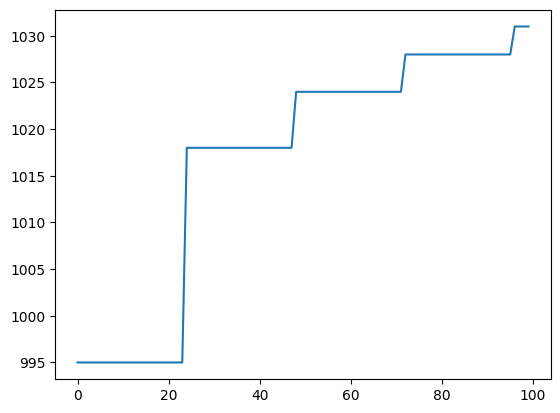

In [104]:
df3['Max TMT'][:100].plot()

In [105]:
# store the imputed hourly tmt data    
path = "C:/Users/SABYA/Aritar01/CAP_106/Raw_Data"  
df3.to_excel(path + "/BA_106_TMT_imputed_hourly_data.xlsx", index=False)

In [106]:
os.getcwd()

'C:\\Users\\SABYA\\Aritar01\\CAP_106\\Raw_Data'

In [107]:
path = "C:/Users/SABYA/Aritar01/CAP_106/Raw_Data"
# change the current working dir to path
os.chdir(path)
os.getcwd()

'C:\\Users\\SABYA\\Aritar01\\CAP_106\\Raw_Data'

In [108]:
# read the imputed TMT data
df4 = pd.read_excel("BA_106_TMT_imputed_hourly_data.xlsx")

In [109]:
df4

,Date,Max TMT,Coil 1,Coil 2,Coil 3,Coil 4,Coil 5,Coil 6
0,2021-01-07 01:00:00,995.0,989.0,988.0,983.0,995.0,989.0,988.0
1,2021-01-07 02:00:00,995.0,989.0,988.0,983.0,995.0,989.0,988.0
2,2021-01-07 03:00:00,995.0,989.0,988.0,983.0,995.0,989.0,988.0
3,2021-01-07 04:00:00,995.0,989.0,988.0,983.0,995.0,989.0,988.0
4,2021-01-07 05:00:00,995.0,989.0,988.0,983.0,995.0,989.0,988.0
...,...,...,...,...,...,...,...,...
11467,2022-06-01 19:00:00,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11468,2022-06-01 20:00:00,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11469,2022-06-01 21:00:00,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0
11470,2022-06-01 22:00:00,1047.0,1020.0,1027.0,1002.0,1025.0,1010.0,1047.0


In [47]:
# paths to store the correlation heatmaps and correlation dataframe
heat_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/Heatmaps"
data_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/CorrInfo"
graph_path = "C:/Users/SABYA/Aritar01/CAP_106/CAP_106_Research_Env/EDA_Report/Graphs"

In [35]:
# correlation analysis for TMT
# computing the upper triangle correlation matrix
corr_mat_1 = df4.corr().abs()
upper_tri_1 = corr_mat_1.where(np.triu(np.ones(corr_mat_1.shape), k=1).astype(np.bool))
upper_tri_1

,Max TMT,Coil 1,Coil 2,Coil 3,Coil 4,Coil 5,Coil 6
Max TMT,NaN,0.768496,0.785132,0.812479,0.816630,0.763730,0.866141
Coil 1,NaN,NaN,0.639691,0.751544,0.597390,0.777587,0.618122
Coil 2,NaN,NaN,NaN,0.558000,0.632349,0.519707,0.719321
Coil 3,NaN,NaN,NaN,NaN,0.700760,0.822988,0.675156
Coil 4,NaN,NaN,NaN,NaN,NaN,0.582506,0.756680
Coil 5,NaN,NaN,NaN,NaN,NaN,NaN,0.670452
Coil 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# store the corr dataframe for Naphtha Feed
df_tmt_corr = pd.DataFrame(corr_mat_1["Max TMT"])
df_tmt_corr.to_excel(data_path + "/tmt_corr_info.xlsx")

In [ ]:
# plotting correlation heatmap for TMT
dataplot = sb.heatmap(upper_tri_1, cmap="Blues", annot=True)
  
# displaying heatmap
# plt.show()

# save the plot as .png
plt.savefig(heat_path +"/tmt_corr_heatmap.png")

In [ ]:
# finding index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri_1.columns if any(upper_tri_1[column] > 0.95)]
print(); print(to_drop)

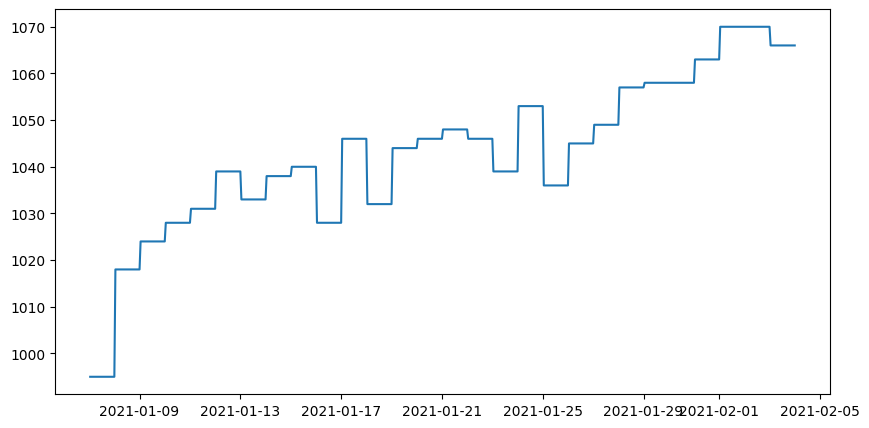

In [50]:
# typical time vs tmt graph for run 1 
plt.figure(figsize=(10,5))
plt.plot(df4['Date'][:672], df4['Max TMT'][:672])
plt.savefig(graph_path + "/tmt_VS_time.png")